In [1]:
using AutomotiveSimulator
using AutomotiveVisualization
using EzXML

In [6]:
# using AutoUrban
using Printf
using LinearAlgebra

include("../src/actions.jl")
include("../src/roadway/roadway_generation.jl")
include("../src/roadway/roadway_perception.jl")
include("../src/roadway/roadway_intersection.jl")
include("../src/roadway/convert2xodr.jl")


convert_roadway! (generic function with 1 method)

## Construct Segment by Segment

In [51]:
#Initialize
roadway = Roadway()

Roadway

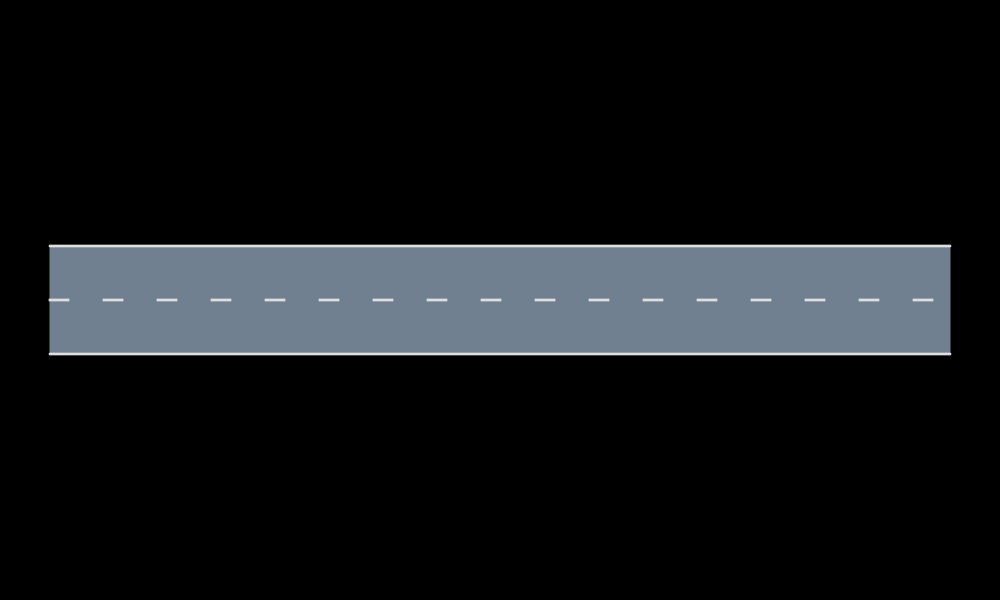

In [52]:
#Add one straight segment
origin = VecSE2(0.0,0.0,0.0) 
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
render([roadway])

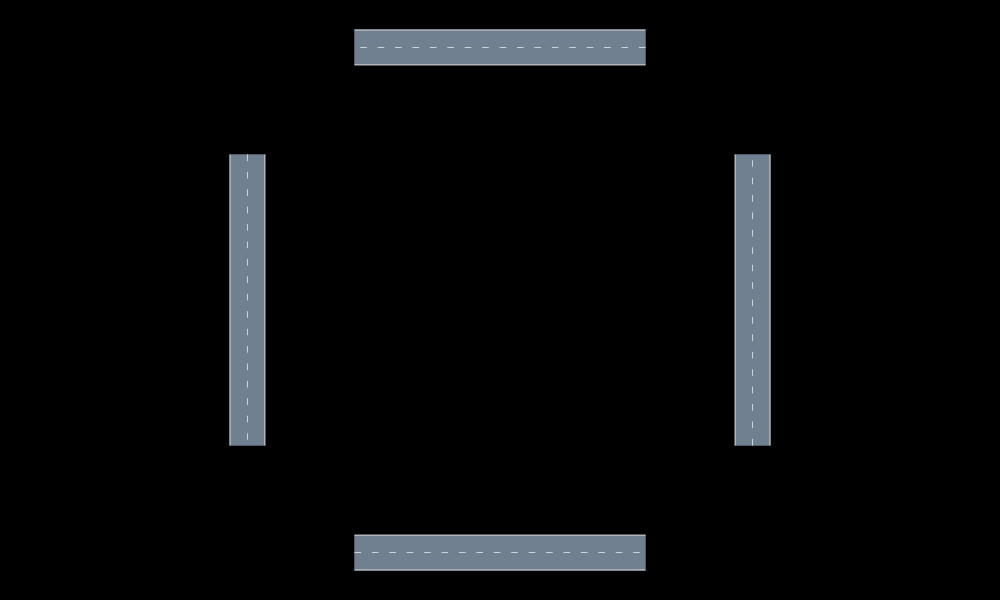

In [53]:
#Add more segments
origin = VecSE2(70.0,20.0,pi/2)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(50.0,90.0,-pi)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(-20.0,70.0,1.5*pi)
laneLength = 50.0
nlanes = 2
add_line!(origin,nlanes,laneLength,roadway)
render([roadway])

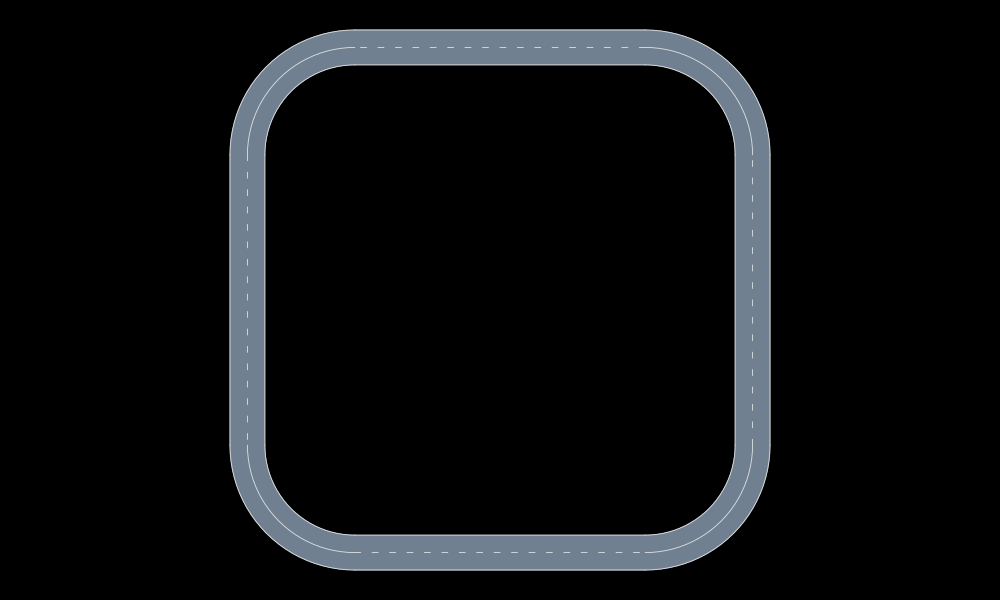

In [54]:
#Connect the segments
connect_two_seg!(roadway.segments[1],roadway.segments[2],roadway)
connect_two_seg!(roadway.segments[2],roadway.segments[3],roadway)
connect_two_seg!(roadway.segments[3],roadway.segments[4],roadway)
connect_two_seg!(roadway.segments[4],roadway.segments[1],roadway)
render([roadway])

## Add Complex Connections (Intersections)

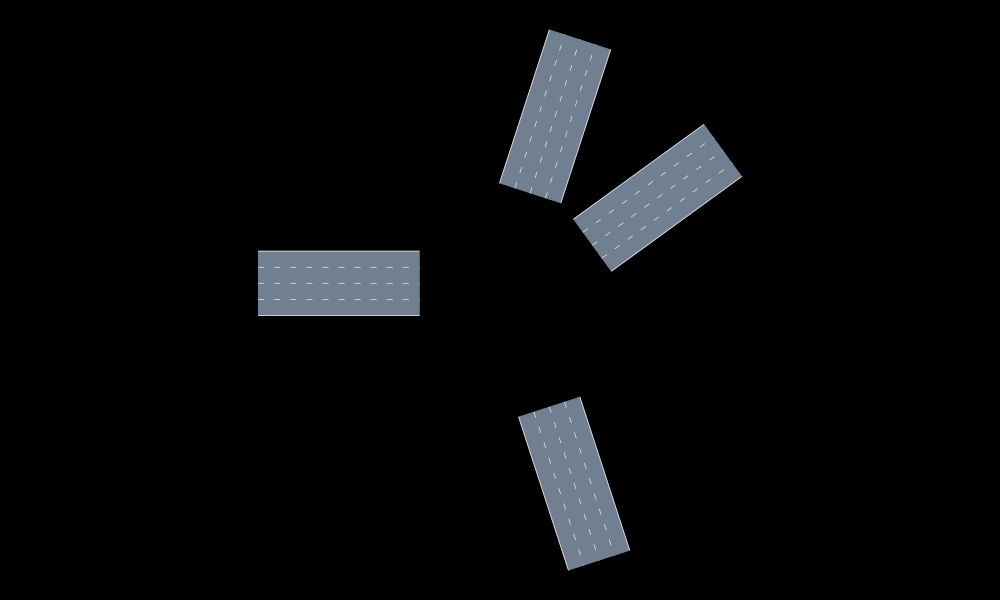

In [41]:
#Add segments
roadway = Roadway()
origin = VecSE2(-50.0,0.0,0.0)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(0.0,-20.0,-0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(15.0,8.0,0.2*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
origin = VecSE2(5.0,20.0,0.4*pi)
laneLength = 30.0
nlanes = 4
add_line!(origin,nlanes,laneLength,roadway)
render([roadway])


In [42]:
#Specify connections
#A Junction contains several Connections
#Connection(1,3) means connect all lanes from segment 1 to segment 3
#Connection(1,2,0,[(1,1),(2,2)]) means connect segment 1 and 2 from lane 1 in segment 1 to lane 2 in segment 2,
#lane 2 in segment 1 to lane 2 in segment2

junctions=[Junction([Connection(1,2,0,[(1,1),(2,2)]),Connection(1,3),Connection(1,4)])]


1-element Array{Junction,1}:
 Junction(Connection[Connection(1, 2, 0, Tuple{Int64,Int64}[(1, 1), (2, 2)]), Connection(1, 3, 0, Tuple{Int64,Int64}[]), Connection(1, 4, 0, Tuple{Int64,Int64}[])])

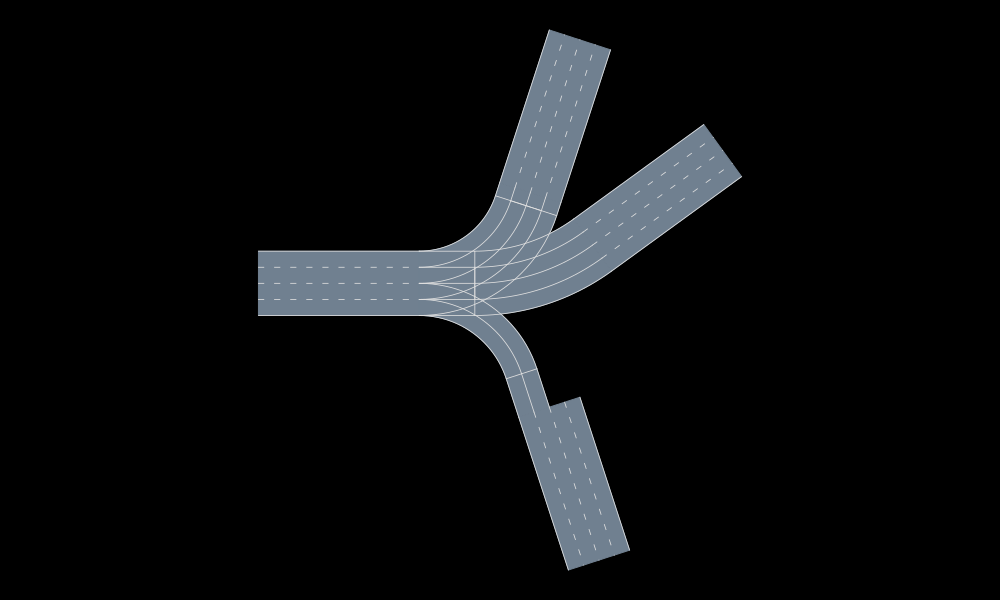

In [43]:
#Add all junctions
for junction in junctions
    add_junction!(junction,roadway)
end
render([roadway])

In [44]:
#Initialze
doc,r = initialize_XML()
#Convert roadway and ignoring any junctions
convert_roadway!(r,roadway)
#Handle junctions
# junctions = [junction];
handle_junctions(r,junctions,roadway)
prettyprint(doc)

<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="30.0" junction="-1">
    <type s="0" type="rural"/>
    <link><successor elementType="junction" elementId="1"/></link>
    <planView>
      <geometry s="0.0" x="-50.0" y="0.0" hdg="0.0" length="30.0">
        <line/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="10.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOffset="0.0" type="solid" weight="standard" color="standard" width="0.5" laneChange="both"/></lane>
        </center>
        <right>
          <lane id="-4" type="driving" level="false">
            <width sOffset="0" a="3.0" b="0.0" c="0.0" d="0.0"/>
            <roadMark sOffset="0.0" type="broken" weight="standard" color="standard" w

In [45]:
write("junctions.xodr",doc)

15749

## If we change lane_4

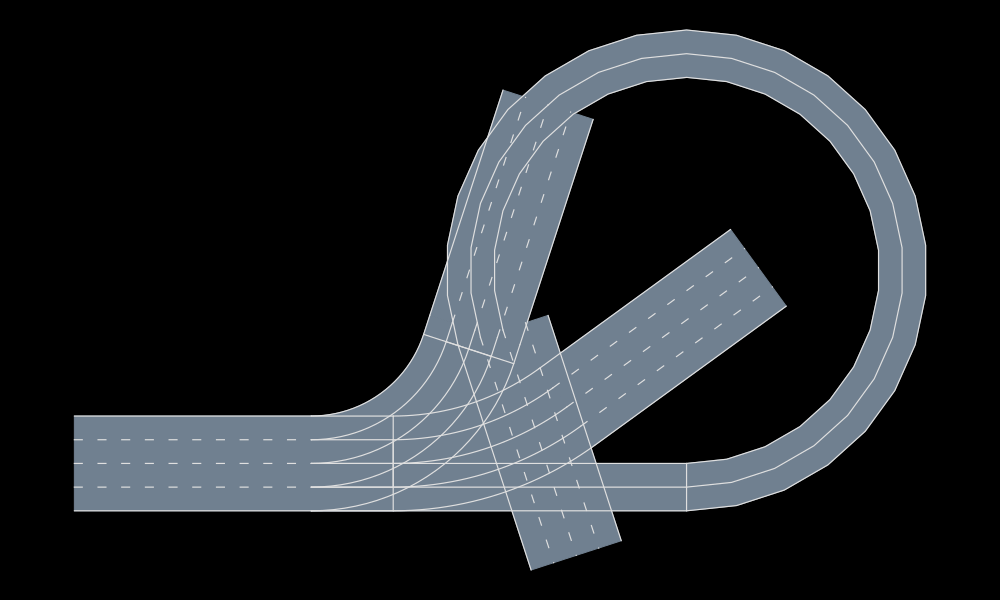

In [33]:
#Add all junctions
for junction in junctions
    add_junction!(junction,roadway)
end
render([roadway])

## Other Built-in Functions

Scene{Entity{VehicleState,BicycleModel,Int64}}(2 entities)

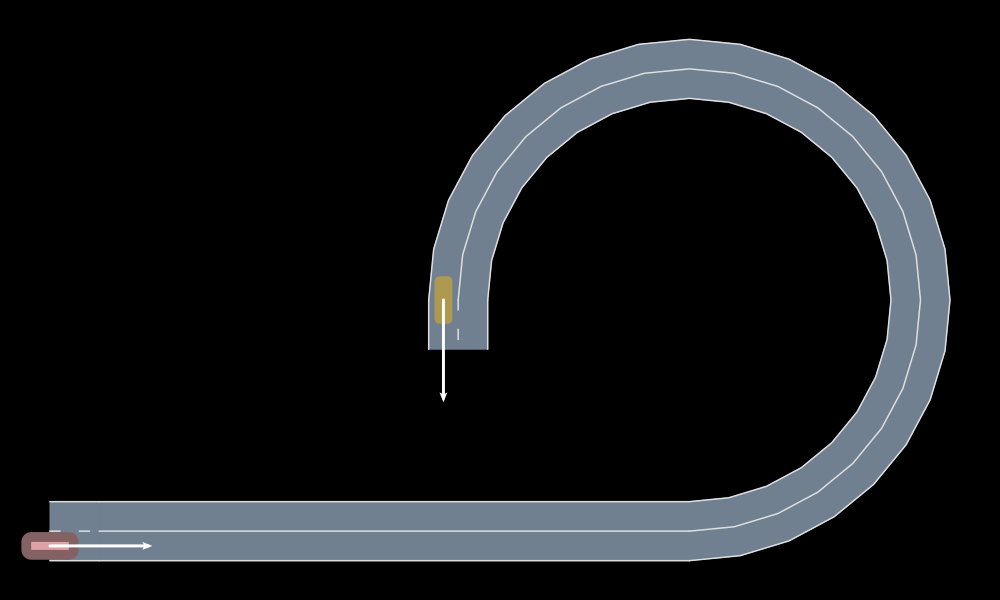

In [19]:
roadlength=5.0
origin1 = VecSE2(10.0,0.0,0.0)
origin2 = VecSE2(0.0+10*roadlength,0.0+5*roadlength,1.5*pi)
roadway=gen_connected_lanes(
    nlanes=2,
    origin1 = origin1,
    origin2 = origin2
)
scene = Scene(Entity{VehicleState, BicycleModel, Int},100)
id=1
push!(scene,Entity(VehicleState(origin1, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))
id += 1
push!(scene,Entity(VehicleState(origin2, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))

print(scene)
render([roadway, scene])

Scene{Entity{VehicleState,BicycleModel,Int64}}(1 entities)

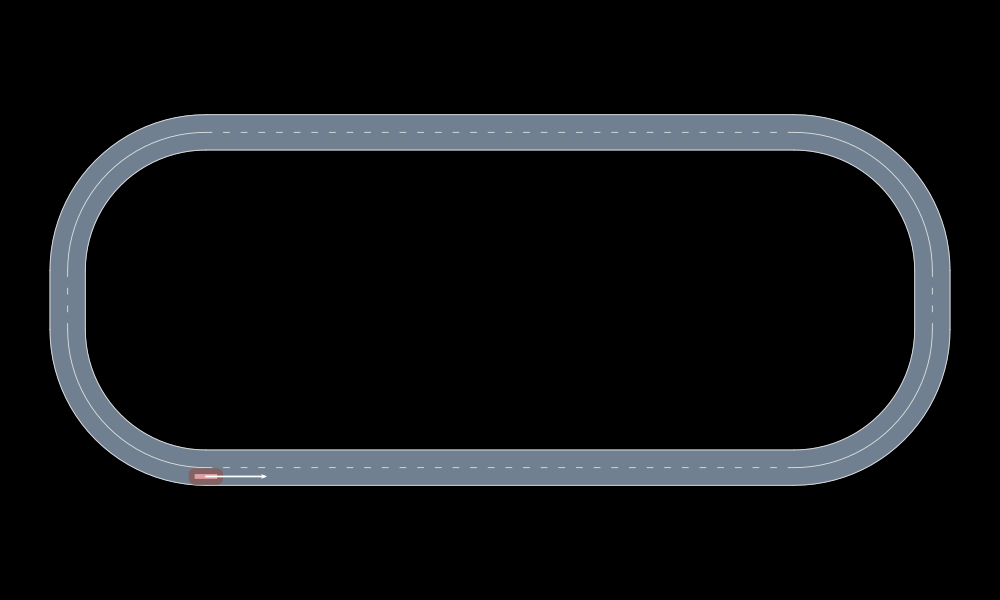

In [20]:
roadway=gen_loop_roadway(2)
scene = Scene(Entity{VehicleState, BicycleModel, Int},100)
origin1 = VecSE2(0.0,0.0,0.0)
id=1
push!(scene,Entity(VehicleState(origin1, roadway, 10.0), 
    BicycleModel(VehicleDef(AgentClass.CAR, 4.826, 1.81)),id))

print(scene)
render([roadway, scene])